In [2]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
# read data
data = pd.read_csv("CA.csv")
#print(data)

In [5]:
# Linear regression on 10 other factors
# let other 10 features be predictors X, solar be Y
all_x = data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][0:55]
all_y = data[['SOEGP']][0:55]
# split data for train and test
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2)
#print(test_x)

           Pred   SOEGP
0   1251.796630   554.0
1   3211.172457  3727.0
2    244.175155     0.0
3     19.341402     0.0
4   1830.632404   399.0
5   1181.899810     0.0
6   -472.236432     0.0
7    840.122444   495.0
8  -1031.094656     0.0
9   3303.266713   647.0
10  2812.330884   765.0


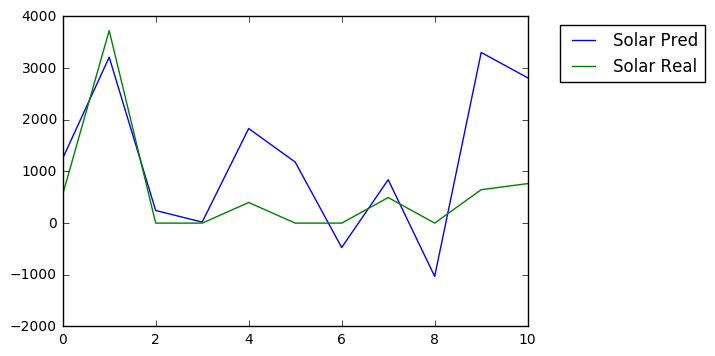

In [40]:
# Use normal linear regression do train and test
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
#print(test_y)
res_df = pd.DataFrame(regr.predict(test_x))
test_y.index = range(11)
result = pd.concat([res_df, test_y], axis=1, join_axes=[res_df.index])
result.columns = ['Pred', 'SOEGP']
print(result)

plt.plot(result['Pred'])
plt.plot(result['SOEGP'])
plt.legend(['Solar Pred', 'Solar Real'], bbox_to_anchor=(1.4, 1))
plt.show()

           Pred   SOEGP
0   1249.991486   554.0
1   3214.677819  3727.0
2    241.392233     0.0
3     17.417032     0.0
4   1821.742476   399.0
5   1178.277384     0.0
6   -469.613453     0.0
7    838.225726   495.0
8  -1029.360546     0.0
9   3290.615434   647.0
10  2804.604912   765.0


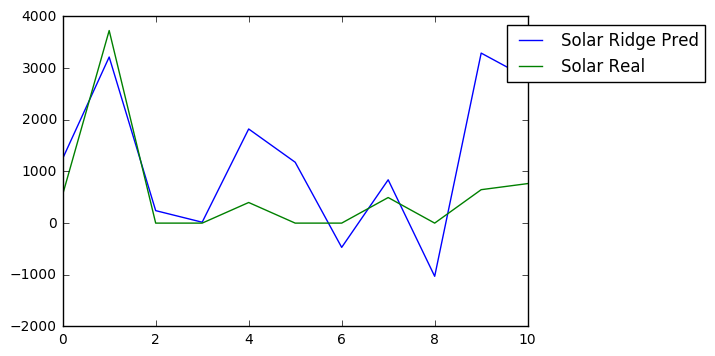

In [43]:
# Use Ridge regression do train and test
regr = linear_model.Ridge(alpha = 0.75)
regr.fit(train_x, train_y)
#print(test_y)
res_df = pd.DataFrame(regr.predict(test_x))
test_y.index = range(11)
result = pd.concat([res_df, test_y], axis=1, join_axes=[res_df.index])
result.columns = ['Pred', 'SOEGP']
print(result)

plt.plot(result['Pred'])
plt.plot(result['SOEGP'])
plt.legend(['Solar Ridge Pred', 'Solar Real'], bbox_to_anchor=(1.4, 1))
plt.show()

/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


           Pred   SOEGP
0    898.362621   554.0
1   3178.386316  3727.0
2    248.427722     0.0
3   -243.264501     0.0
4   1050.741284   399.0
5    892.389470     0.0
6   -195.854832     0.0
7     59.175479   495.0
8   -890.337343     0.0
9    780.248087   647.0
10  1432.133127   765.0


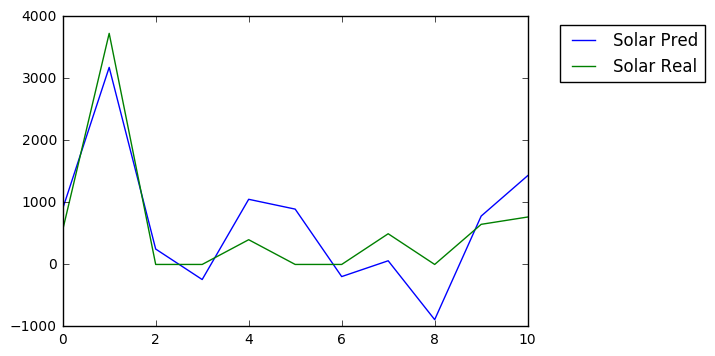

In [44]:
# Use Lasso regression do train and test
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=2)
lasso.fit(train_x, train_y)

#print(test_y)
res_df = pd.DataFrame(lasso.predict(test_x))
test_y.index = range(11)
result = pd.concat([res_df, test_y], axis=1, join_axes=[res_df.index])
result.columns = ['Pred', 'SOEGP']
print(result)

plt.plot(result['Pred'])
plt.plot(result['SOEGP'])
plt.legend(['Solar Pred', 'Solar Real'], bbox_to_anchor=(1.4, 1))
plt.show()

/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/User

    Pred   SOEGP
0   10.5   554.0
1   10.5  3727.0
2   10.5     0.0
3   10.5     0.0
4   10.5   399.0
5   10.5     0.0
6   10.5     0.0
7   10.5   495.0
8   10.5     0.0
9   10.5   647.0
10  10.5   765.0


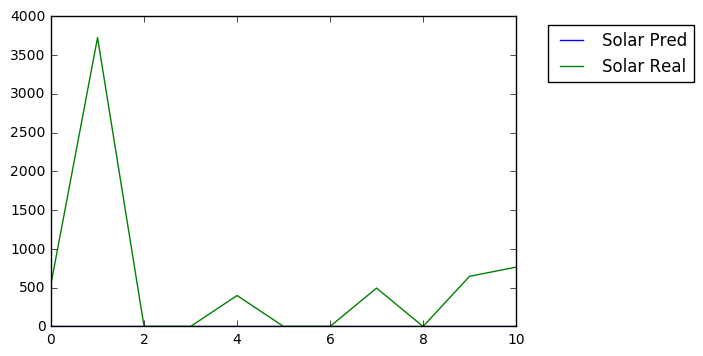

In [47]:
# SVM prediction
from sklearn.svm import SVR
from sklearn import cross_validation
# SVR for solar in CA
clf = SVR(kernel='sigmoid', C=99.0, epsilon=0.1)
svr = clf.fit(train_x, train_y)
scores = cross_validation.cross_val_score(clf, train_x, train_y, cv=5)

res_df = pd.DataFrame(svr.predict(test_x))
test_y.index = range(11)
result = pd.concat([res_df, test_y], axis=1, join_axes=[res_df.index])
result.columns = ['Pred', 'SOEGP']
print(result)

plt.plot(result['Pred'])
plt.plot(result['SOEGP'])
plt.legend(['Solar Pred', 'Solar Real'], bbox_to_anchor=(1.4, 1))
plt.show()